In [72]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
plt.style.use("fivethirtyeight")
# Professional colours
# axes.color_cycle    : 332288, 88CCEE, 44AA99, 117733, 999933, DDCC77, CC6677, 882255, AA4499
# Source: https://stats.stackexchange.com/questions/118033/best-series-of-colors-to-use-for-differentiating-series-in-publication-quality
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [88]:
y = [1,2,3,-1,-2, -3]
np.abs(y)

array([1, 2, 3, 1, 2, 3])

In [122]:
data = pd.read_csv("rainfall_monthly_total_singapore_20220425.csv")

In [123]:
def processData(data):
    
    data = data.copy()
    data["date"] = data["month"].apply(lambda x: x + "-01")
    data["date"] = data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
    data["year"] = data.date.apply(lambda x: x.year)
    data["month"] = data.date.apply(lambda x: x.month)
    data.index = data["date"]
    if data.index.is_unique:
        print("Unique daily records")
    else:
        print("Duplicate dates exist!")
    data["total_rainfall_12ma"] = data["total_rainfall"].rolling(12).mean()
    data["total_rainfall_previous_month"] = data["total_rainfall"].shift(1)
    data["total_rainfall_previous_12months"] = data["total_rainfall"].shift(12)
    
    return data

In [124]:
def correlationLags(data):
    
    correlations = []
    
    for i in range(1, 25):
        correlationValue = data.total_rainfall.corr(data.total_rainfall.shift(i))
        print(f"Correlation at lag {i}: {correlationValue}")
        correlations.append(correlationValue)
        
    minCorrelationIndex = np.argmin(np.abs(correlations))
    maxCorrelationIndex = np.argmax(np.abs(correlations))
    
    print(f"Strongest correlation at lag {maxCorrelationIndex+1}")
    print(f"Weakest correlation at lag {minCorrelationIndex+1}")
        
    return correlations

In [125]:
def plotMA(data):
    
    data["total_rainfall"].plot(color = "#88CCEE", linestyle = "solid", linewidth = 1, figsize = (15, 7), label = "Original")
    data["total_rainfall_12ma"].plot(color = "#44AA99", linestyle = "solid", linewidth = 3, label = "12-month Moving Average")
    plt.legend(loc = "best")
    plt.title("Rainfall monthly in Singapore")
    plt.show()

In [126]:
def groupPlot(data):
    
    # Determine seasonality
    yearGroup = data.groupby("year").total_rainfall.mean()
    yearGroupDf = pd.DataFrame(yearGroup)
    monthGroup = data.groupby("month").total_rainfall.mean()
    monthGroupDf = pd.DataFrame(monthGroup)
    
    # Create seasonality plots
    fig = plt.figure(figsize = (15, 7))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    
    ax1.plot(yearGroupDf.index, yearGroupDf.total_rainfall, linestyle = '-', color = '#332288')
    
    ax2.plot(monthGroupDf.index, monthGroupDf.total_rainfall, linestyle = '-', color = '#117733')
    plt.show()

Unique daily records
Correlation at lag 1: 0.17723471605982383
Correlation at lag 2: 0.04575601692678639
Correlation at lag 3: -0.06309408002897107
Correlation at lag 4: 0.021775142556025105
Correlation at lag 5: -0.08679252389436215
Correlation at lag 6: -0.03457348099908631
Correlation at lag 7: -0.014556151709412019
Correlation at lag 8: 0.051544939967774595
Correlation at lag 9: -0.07520342392208
Correlation at lag 10: -0.02870745902219973
Correlation at lag 11: 0.09013408732364477
Correlation at lag 12: 0.24828950201581923
Correlation at lag 13: 0.0629474580404434
Correlation at lag 14: 0.010308005287181787
Correlation at lag 15: -0.12580007173168015
Correlation at lag 16: -0.06135549102472368
Correlation at lag 17: -0.13954668179132318
Correlation at lag 18: -0.07468999274008686
Correlation at lag 19: -0.08505526072596525
Correlation at lag 20: 0.021042926841787424
Correlation at lag 21: -0.11987537379085267
Correlation at lag 22: 0.007275479874264713
Correlation at lag 23: 0.052

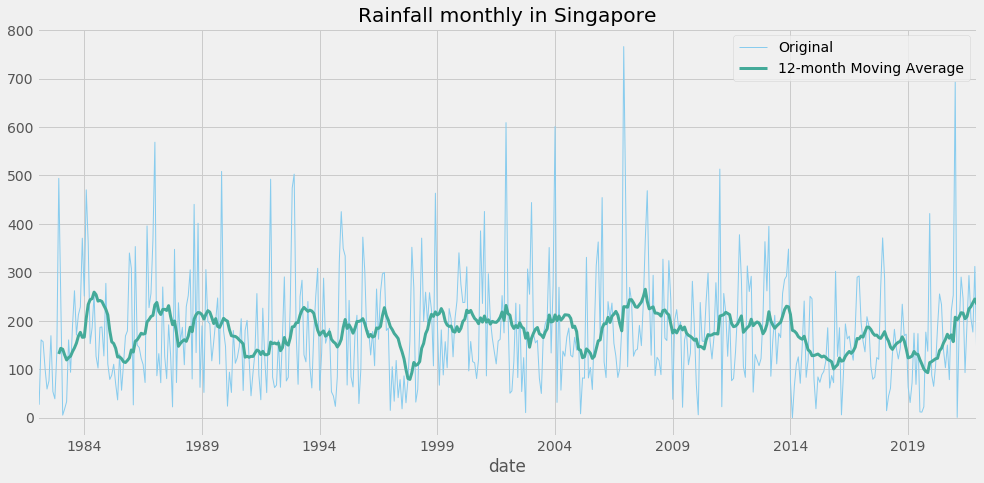

AttributeError: 'Line2D' object has no property 'title'

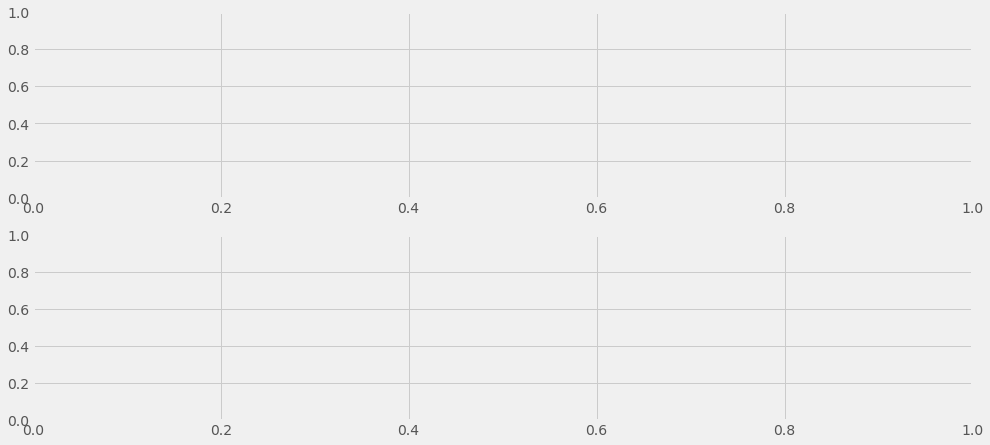

In [127]:
data = processData(data)
data = data[data.year < 2022]
correlations = correlationLags(data)
plotMA(data)
groupPlot(data)

In [121]:
data["year"] = data.date.apply(lambda x: x.year)

In [11]:
data.head()

,month,total_rainfall,date,total_rainfall_12ma,total_rainfall_previous_month,total_rainfall_previous_12months,year
date,,,,,,,
1982-01-01,1982-01,107.1,1982-01-01,NaN,NaN,NaN,1982
1982-02-01,1982-02,27.8,1982-02-01,NaN,107.1,NaN,1982
1982-03-01,1982-03,160.8,1982-03-01,NaN,27.8,NaN,1982
1982-04-01,1982-04,157.0,1982-04-01,NaN,160.8,NaN,1982
1982-05-01,1982-05,102.2,1982-05-01,NaN,157.0,NaN,1982


In [14]:
g = data.groupby("year").total_rainfall

In [16]:
x = g.mean()

In [20]:
x = pd.DataFrame(x)

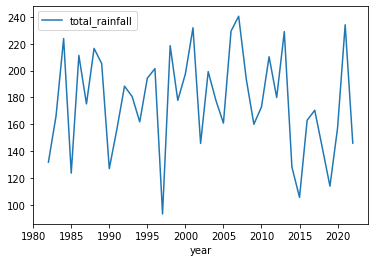

In [23]:
x.plot()

In [24]:
data["month"] = data.date.apply(lambda x: x.month)
data.head()

,month,total_rainfall,date,total_rainfall_12ma,total_rainfall_previous_month,total_rainfall_previous_12months,year
date,,,,,,,
1982-01-01,1,107.1,1982-01-01,NaN,NaN,NaN,1982
1982-02-01,2,27.8,1982-02-01,NaN,107.1,NaN,1982
1982-03-01,3,160.8,1982-03-01,NaN,27.8,NaN,1982
1982-04-01,4,157.0,1982-04-01,NaN,160.8,NaN,1982
1982-05-01,5,102.2,1982-05-01,NaN,157.0,NaN,1982


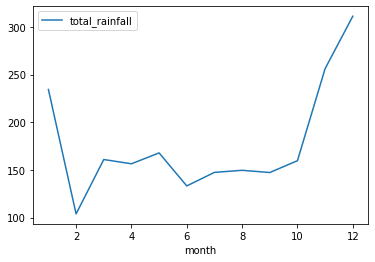

In [25]:
g2 = data.groupby("month").total_rainfall
x2 = g2.mean()
x2 = pd.DataFrame(x2)
x2.plot()

In [31]:
len(set(data["year"].values))

41